In [1]:
from src.attack_network import *
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.4 #set the value globally
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [17]:
G = create_network()

num_divisions = 200
N_nodes = len([v for v in G.nodes()])

num_nodes_largest = [N_nodes]
num_nodes_remove = [0]
N_lim = 5200
for i in range(1,N_lim):
    nodes = [v for v in G.nodes()]
    node, degree = max(G.degree, key=lambda x: x[1])
    G.remove_node(node)
    conditional = are_multiples(len(nodes), num_divisions)

    components = list(nx.connected_components(G))
    largest_component = max(components, key=len)
    largest_subgraph = G.subgraph(largest_component)
    nodes = [v for v in largest_subgraph.nodes()]
    num_nodes_largest.append(len(nodes))
    num_nodes_remove.append(i)
num_nodes_largest =  [i/N_nodes for i in num_nodes_largest]
num_nodes_remove = [i/N_nodes for i in num_nodes_remove]
data_malicious_attack = {"N_nodes":num_nodes_largest, "N_remove":num_nodes_remove}
df_malicious = pd.DataFrame(data=data_malicious_attack)
df_malicious.to_csv("../data/attack_network/malicious_degree.csv",index=False,mode="w")


In [19]:
df_malicious

,N_nodes,N_remove
0,1.000000,0.000000
1,0.927521,0.000038
2,0.890392,0.000076
3,0.861863,0.000114
4,0.851444,0.000152
...,...,...
5195,0.000076,0.196825
5196,0.000076,0.196863
5197,0.000076,0.196901
5198,0.000076,0.196939


In [20]:
index_range_1 = []
index_range_2 = []
for i in range(len(df_malicious)):
    if(df_malicious["N_remove"].values[i]<=0.05):
        index_range_1.append(i)
    else:
        index_range_2.append(i)

In [114]:
N_nodes = []
N_remove = []
factor = len(index_range_1)/40
factor
for i in range(len(index_range_1)):
    if(are_multiples(index_range_1[i], factor)==True):
        N_remove.append(df_malicious["N_remove"].values[index_range_1[i]])
        N_nodes.append(df_malicious["N_nodes"].values[index_range_1[i]])

In [106]:
N_nodes

[1.0,
 0.6261650375085247,
 0.5337576721982269,
 0.4642342956732591,
 0.4049026293854664,
 0.35462605137531256,
 0.3081761006289308,
 0.2563082518754262,
 0.2060316738652724,
 0.1557929832537698]

In [98]:
len(df_malicious)

5200

In [115]:
factor_2 = len(index_range_2)/20
factor_2
for i in range(len(index_range_2)):
    if(are_multiples(index_range_2[i], factor_2)==True):
        N_remove.append(df_malicious["N_remove"].values[index_range_2[i]])
        N_nodes.append(df_malicious["N_nodes"].values[index_range_2[i]])

In [53]:
index_range_2[0]

1320

In [ ]:
0, 0.05 -> 20 pontos
0.05 0.2 -> 6 pontos
n+b = 26

In [74]:
df_malicious["N_remove"]

0       0.000000
1       0.000038
2       0.000076
3       0.000114
4       0.000152
          ...   
5195    0.196825
5196    0.196863
5197    0.196901
5198    0.196939
5199    0.196977
Name: N_remove, Length: 5200, dtype: float64

In [72]:
N_remove

[0.0,
 0.0025005683109797683,
 0.005001136621959537,
 0.0075017049329393045,
 0.010002273243919073,
 0.012502841554898841,
 0.015003409865878609,
 0.01750397817685838,
 0.020004546487838146,
 0.022505114798817914,
 0.025005683109797682,
 0.02750625142077745,
 0.030006819731757218,
 0.032507388042736986,
 0.03500795635371676,
 0.03750852466469652,
 0.04000909297567629,
 0.04250966128665606,
 0.04501022959763583,
 0.04751079790861559,
 0.05512616503750852,
 0.0735015533833447,
 0.09187694172918087,
 0.11025233007501704,
 0.12862771842085322,
 0.1470031067666894,
 0.1653784951125256,
 0.18375388345836174]

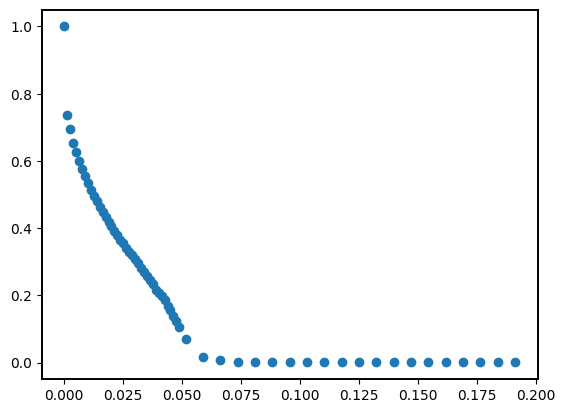

In [116]:
plt.plot(N_remove,N_nodes,"o")
#plt.plot(df_malicious["N_remove"].values,df_malicious["N_nodes"].values,"o")
#plt.xscale("log")
#plt.yscale("log")
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.show()